In [18]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')


In [7]:
# Reading in the data
churn = pd.read_csv('/Users/gregory/Desktop/data_mining_2/Projects/Project_4/Data/telco_churn_data_clean.csv')

churn.head()

,Unnamed: 0,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,...,Married,Number_of_Dependents,Zip_Code,Population,Churn_Value,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction
0,3,1,1,25,3.0,1,19.76,0,1,1.0,...,1,1,90303,27778,1,5337,2.0,1,1,2.0
1,4,1,1,37,3.0,1,6.33,1,1,2.0,...,1,1,90602,26265,1,2793,3.0,1,0,2.0
2,5,0,0,27,3.0,1,3.33,1,1,1.0,...,0,1,90660,63288,1,4638,1.0,0,0,2.0
3,6,1,1,1,5.0,1,15.28,0,1,2.0,...,1,2,90720,21343,1,3964,5.0,7,0,1.0
4,7,1,6,58,2.0,0,0.00,0,1,2.0,...,1,0,91024,10558,1,5444,2.0,2,1,1.0


In [8]:
# Drop the unnamed column

churn2 = churn.drop('Unnamed: 0', axis = 1)

churn2.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,...,Married,Number_of_Dependents,Zip_Code,Population,Churn_Value,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction
0,1,1,25,3.0,1,19.76,0,1,1.0,13,...,1,1,90303,27778,1,5337,2.0,1,1,2.0
1,1,1,37,3.0,1,6.33,1,1,2.0,15,...,1,1,90602,26265,1,2793,3.0,1,0,2.0
2,0,0,27,3.0,1,3.33,1,1,1.0,20,...,0,1,90660,63288,1,4638,1.0,0,0,2.0
3,1,1,1,5.0,1,15.28,0,1,2.0,33,...,1,2,90720,21343,1,3964,5.0,7,0,1.0
4,1,6,58,2.0,0,0.00,0,1,2.0,26,...,1,0,91024,10558,1,5444,2.0,2,1,1.0


In [9]:
# Moving target for ease of access

churn_val = churn2.pop('Churn_Value')
churn2.insert(37, "Churn_Value", churn_val)

churn2.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,...,Married,Number_of_Dependents,Zip_Code,Population,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction,Churn_Value
0,1,1,25,3.0,1,19.76,0,1,1.0,13,...,1,1,90303,27778,5337,2.0,1,1,2.0,1
1,1,1,37,3.0,1,6.33,1,1,2.0,15,...,1,1,90602,26265,2793,3.0,1,0,2.0,1
2,0,0,27,3.0,1,3.33,1,1,1.0,20,...,0,1,90660,63288,4638,1.0,0,0,2.0,1
3,1,1,1,5.0,1,15.28,0,1,2.0,33,...,1,2,90720,21343,3964,5.0,7,0,1.0,1
4,1,6,58,2.0,0,0.00,0,1,2.0,26,...,1,0,91024,10558,5444,2.0,2,1,1.0,1


In [13]:
churn2

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,...,Married,Number_of_Dependents,Zip_Code,Population,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction,Churn_Value
0,1,1,25,3.0,1,19.76,0,1,1.0,13,...,1,1,90303,27778,5337,2.0,1,1,2.0,1
1,1,1,37,3.0,1,6.33,1,1,2.0,15,...,1,1,90602,26265,2793,3.0,1,0,2.0,1
2,0,0,27,3.0,1,3.33,1,1,1.0,20,...,0,1,90660,63288,4638,1.0,0,0,2.0,1
3,1,1,1,5.0,1,15.28,0,1,2.0,33,...,1,2,90720,21343,3964,5.0,7,0,1.0,1
4,1,6,58,2.0,0,0.00,0,1,2.0,26,...,1,0,91024,10558,5444,2.0,2,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0,0,72,3.4,1,22.77,0,0,2.0,0,...,0,0,92285,2182,5306,1.0,0,0,4.0,0
7036,1,1,24,3.0,1,36.05,1,1,3.0,24,...,1,2,92301,18980,2140,1.0,2,0,4.0,0
7037,1,4,72,3.0,1,29.66,1,1,2.0,59,...,1,2,92304,42,5560,1.0,2,0,4.0,0
7038,1,1,11,3.0,0,0.00,0,1,3.0,17,...,1,2,92305,301,2793,1.0,0,0,4.0,0


In [15]:
# Split data

X = churn2.iloc[:, 0:37] 
y = churn2.iloc[:, 37]

# Min-Max

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, train_size=0.8, stratify=y, random_state=0)


In [17]:
# GridSearchCV

parameters = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5, 1, 2]
}

ada = AdaBoostClassifier()
clf = GridSearchCV(ada, parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_) 

AdaBoostClassifier(learning_rate=1, n_estimators=100)


0.9578231292517007

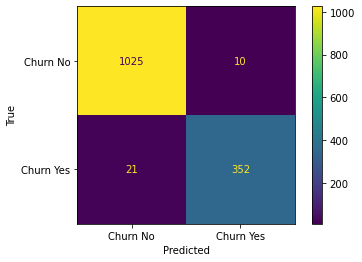

In [35]:
# RFE

ada = AdaBoostClassifier(learning_rate=1, n_estimators=100)
selector = RFE(ada) 
selector.fit(X_train,y_train)

X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

ada.fit(X_train_rfe, y_train)
y_pred = ada.predict(X_test_rfe)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['Churn No', 'Churn Yes'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

f1_score(y_test,y_pred) # 95.78%

In [37]:
# Feature Names
X_train_df = pd.DataFrame(data=X_train)
features = selector.fit_transform(X_train,y_train) 
feature_idx = selector.get_support(indices=True)
feature_names = X_train_df.columns[feature_idx]
features = pd.DataFrame(features, columns=feature_names)
features.head()

# Selected Predictors:

# 1: Number_of_Referrals
# 2: Tenure_in_Months
# 3: Offer
# 5: Avg_Monthly_Long_Distance_Charges
# 8: Internet_Type
# 9: Avg_Monthly_GB_Download
# 20: Payment_Method
# 21: Monthly_Charge
# 22: Total_Regular_Charges
# 24: Total_Extra_Data_Charges
# 25: Total_Long_Distance_Charges
# 29: Number_of_Dependents
# 30: Zip_Code
# 31: Population
# 32: CLTV
# 34: Total_Customer_Svc_Requests
# 35: Product/Service_Issues_Reported
# 36: Customer_Satisfaction

,1,2,3,5,8,9,20,21,22,24,25,29,30,31,32,34,35,36
0,0.000000,0.253521,0.75,0.343469,0.20,0.000000,0.5,0.005246,0.030048,0.000000,0.091516,0.0,0.213043,0.335448,0.203024,0.222222,0.000000,0.75
1,0.454545,1.000000,0.00,0.427485,1.00,0.138298,0.0,0.932903,0.967701,0.000000,0.431630,0.0,0.383477,0.069466,0.533911,0.333333,0.166667,0.50
2,0.272727,0.619718,0.25,0.616123,1.00,0.031915,0.5,0.630521,0.443024,0.000000,0.388810,0.0,0.915921,0.023985,0.311319,0.000000,0.000000,0.50
3,0.000000,0.014085,1.00,0.879376,0.50,0.159574,0.0,0.605166,0.015088,0.003397,0.024664,0.0,0.498455,0.028070,0.711586,0.000000,0.000000,0.25
4,0.000000,0.154930,0.75,0.779356,0.25,0.000000,0.5,0.017170,0.028462,0.000000,0.131152,0.0,0.419743,0.042223,0.665555,0.000000,0.000000,1.00
